# Analyze

In [23]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

import tools.common_functions as cf

import importlib

importlib.reload(cf)

# Parameters
SENSOR_LAG = 25 # ms
ARRAY_W = 2
ARRAY_H = 2
ARRAY_SIZE = ARRAY_W * ARRAY_H
NAME_PREFIX = lambda i: f"H1_5-s{i}-20231218-005"
#NAMES = [f"H1_5_s{i}" for i in range(ARRAY_SIZE)]


In [24]:
NAMES = [f"{NAME_PREFIX(i)}" for i in range(ARRAY_SIZE)]
data_columns = [f'X{i}' for i in range(ARRAY_SIZE)] + [f'Y{i}' for i in range(ARRAY_SIZE)] + [f'Z{i}' for i in range(ARRAY_SIZE)]

all_data = []

# Loading data (but not in 1 pd.DataFrame)
for name in NAMES:
    TFdata = cf.read_csv_file(f"../data/raw/TF/{name}.csv") 
    sensordata = cf.read_csv_file(f'../data/raw/sensor/{name}.csv')
    
    # Time sync
    data = cf.time_sync_data(sensordata, TFdata, SENSOR_LAG / 1000)

    # Remove mean of first 100 samples
    data = cf.offset_data(data, data_columns, 100)

    all_data.append(data)

print("Data loaded. Taxel 0 sensor test")
all_data[0].info()
print(len(all_data))

Data loaded. Taxel 0 sensor test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17515 entries, 0 to 17514
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    17515 non-null  int64  
 1   t_wall   17515 non-null  float64
 2   X0       17514 non-null  float64
 3   Y0       17514 non-null  float64
 4   Z0       17514 non-null  float64
 5   X1       17514 non-null  float64
 6   Y1       17514 non-null  float64
 7   Z1       17514 non-null  float64
 8   X2       17514 non-null  float64
 9   Y2       17514 non-null  float64
 10  Z2       17514 non-null  float64
 11  X3       17514 non-null  float64
 12  Y3       17514 non-null  float64
 13  Z3       17514 non-null  float64
 14  t_robot  17515 non-null  float64
 15  F_x      17515 non-null  float64
 16  F_y      17515 non-null  float64
 17  F_z      17515 non-null  float64
 18  T_x      17515 non-null  float64
 19  T_y      17515 non-null  float64
 20  T_z      17515 no

In [25]:
all_data[0].head()

,index,t_wall,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X3,Y3,Z3,t_robot,F_x,F_y,F_z,T_x,T_y,T_z
0,4638,1.702925e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19360.312000,-0.039393,0.014773,0.011796,0.000594,0.002090,0.000272
1,0,1.702925e+09,-0.004899,-0.000198,-0.006497,-0.001793,-0.004751,-0.007273,0.003688,0.002908,...,0.001745,-0.003758,0.002723,19360.320667,-0.045391,0.006647,-0.007739,0.000191,0.002061,0.000499
2,1,1.702925e+09,-0.003999,-0.003498,0.000763,0.000307,-0.004451,-0.000981,0.001288,0.002308,...,0.005645,0.004342,-0.000181,19360.329333,-0.051389,-0.001479,-0.027274,-0.000213,0.002031,0.000726
3,2,1.702925e+09,0.005901,-0.000798,-0.013273,0.003007,0.001849,-0.000981,-0.000212,0.002308,...,-0.000955,-0.002258,-0.000181,19360.338000,-0.057387,-0.009606,-0.046809,-0.000616,0.002001,0.000953
4,3,1.702925e+09,0.003501,-0.001098,-0.001173,-0.001193,-0.000251,0.000955,-0.001412,-0.000992,...,-0.000955,-0.005258,-0.000665,19360.346667,-0.063385,-0.017732,-0.066344,-0.001019,0.001972,0.001179


# Add features

In [26]:
for j in range(ARRAY_SIZE):
    data = all_data[j]
    
    data['F_xy'] = np.sqrt(data['F_x']**2 + data['F_y']**2)
    data['F_m'] = np.sqrt(data['F_x']**2 + data['F_y']**2 + data['F_z']**2)
    
    for i in range(ARRAY_SIZE):
        data[f'XY{i}'] = np.sqrt(data[f'X{i}']**2 + data[f'Y{i}']**2)
        data[f'M{i}'] = np.sqrt(data[f'X{i}']**2 + data[f'Y{i}']**2 + data[f'Z{i}']**2)

# Scatterplots

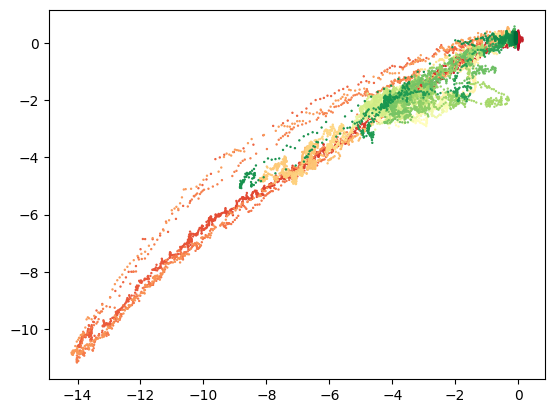

In [30]:

# Color the dots according to their index
colors = np.linspace(0, 1, len(all_data[1]['Z1']))
cmap = plt.cm.RdYlGn

plt.scatter(all_data[1]['Z1'], all_data[1]['F_z'], s=0.5, c=colors, cmap=cmap)

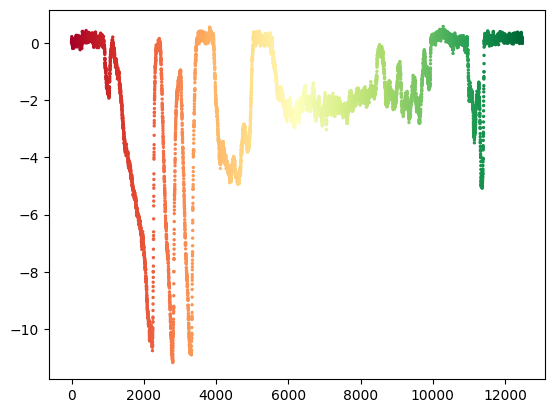

In [29]:
plt.scatter(range(len(all_data[1]['F_z'])), all_data[1]['F_z'], c=colors, cmap=cmap, s=2)

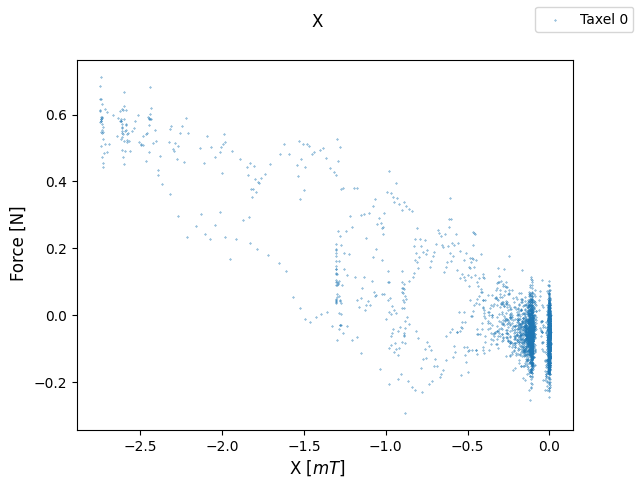

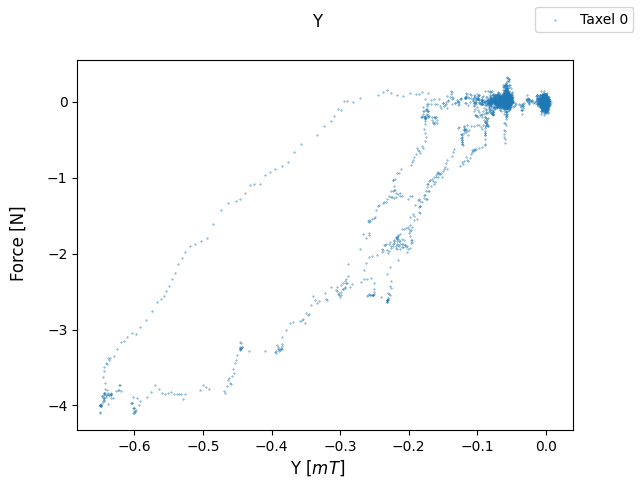

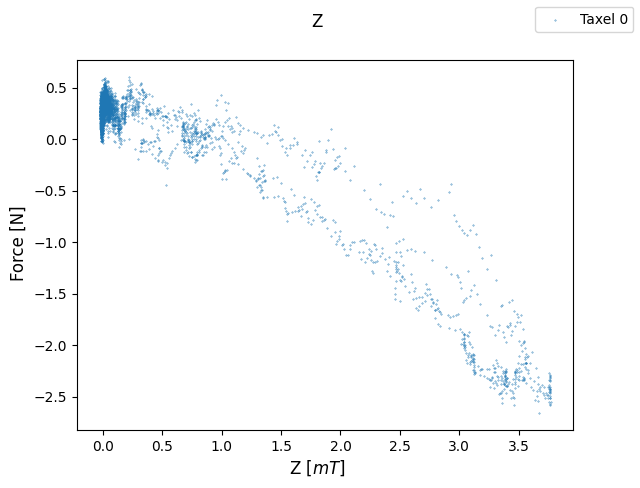

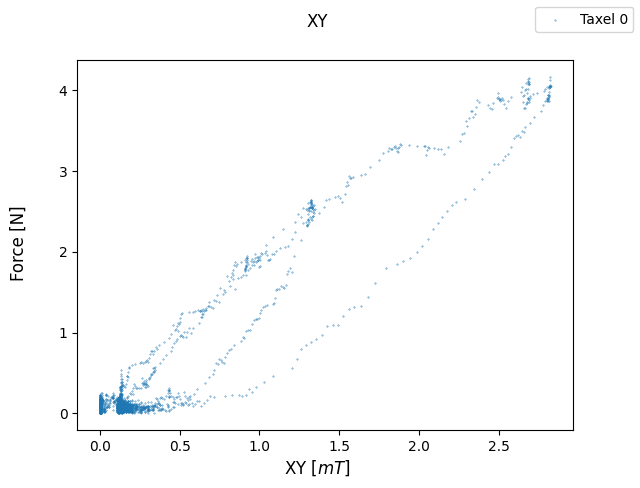

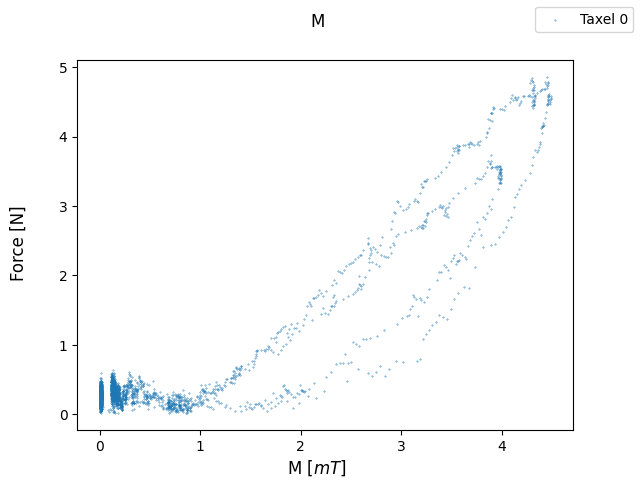

In [161]:
for letter in ['X', 'Y', 'Z', 'XY', 'M']:

  fig = plt.figure()
  gs = fig.add_gridspec(ARRAY_H, ARRAY_W)
  axs = gs.subplots()
  
  for i in range(ARRAY_SIZE):
    data = all_data[i]
    for w in range(ARRAY_W):
      for h in range(ARRAY_H):
        if ARRAY_SIZE == 1:
          ax = axs
        elif ARRAY_W == 1 or ARRAY_H == 1:
          ax = axs[i]
        else:    
          ax = axs[h, w]
        
        ax.scatter(data[f'{letter}{w*ARRAY_W+h}'], data[f'F_{letter.lower()}'], s=0.1, alpha=1, label=f'Taxel {i}')
      
  fig.supylabel('Force [N]')
  fig.supxlabel(fr'{letter} [$mT$]')

  lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
  lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
  fig.legend(lines, labels)
  
  plt.suptitle(f'{letter}')
  plt.show()